In [2]:
import torch

import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl

from sparsecoding import inference
from sparsecoding.visualization import plot_dictionary
from sparsecoding.data.utils import load_bars_dictionary, load_olshausen_dictionary

## Load an existing dictionary

A good way of evaluating whether or not a inference method is working correctly is by generating data from a known dictionary. In this notebook, this is done using two dictionaries provided in this repo:
1) horizontal and vertical bars

2) a dictionary optimized on patches from natural scenes

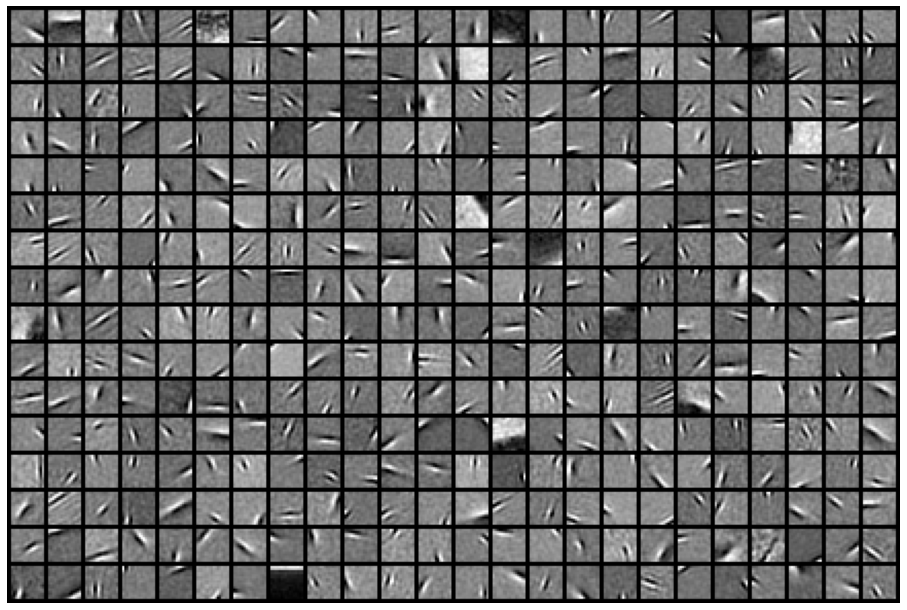

In [3]:
# dictionary = load_bars_dictionary()
dictionary = load_olshausen_dictionary()
patch_size = int(np.sqrt(dictionary.shape[0]))
n_basis = dictionary.shape[1]

nrow = 24
fig,ax = plot_dictionary(dictionary,nrow=nrow,size=16)

## Generate random data from loaded dictionary

In [4]:
n_samples = 100
min_coefficient_val = 0.8

# generate coefficients
coefficients = torch.rand([n_samples,n_basis]) 
coefficients[coefficients < min_coefficient_val] = 0

# generate dataset
data = (dictionary@coefficients.t()).t()

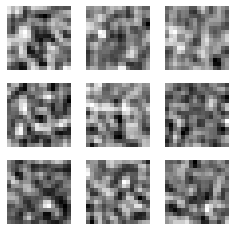

In [5]:
figure = plt.figure(figsize=(4,4))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(data), size=(1,)).item()
    img = (data[sample_idx])
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze().reshape([patch_size,patch_size]), cmap="gray")
plt.show()

In [6]:
# The Locally Competitive Algorithm
lca = inference.LCA(coeff_lr=1e-3,threshold=0.1,n_iter=300)
A = lca.infer(data,dictionary)

reconstruction = (dictionary@A.t()).t()

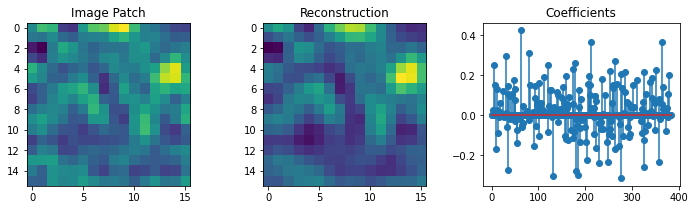

In [7]:
fig,(ax1,ax2,ax3)=  plt.subplots(figsize=(12,3),nrows=1, ncols=3)
ax1.imshow(data[0,:].detach().reshape(patch_size,patch_size))
ax1.set_title('Image Patch')

ax2.imshow(reconstruction[0,:].detach().reshape(patch_size,patch_size))
ax2.set_title('Reconstruction')

ax3.stem(A[0,:].reshape(-1))
ax3.set_title('Coefficients')
plt.show()

In [8]:
# Vanilla inference method
vanilla = inference.Vanilla(coeff_lr=1e-3,sparsity_penalty=1,n_iter=300)
A = vanilla.infer(data,dictionary)
reconstruction = (dictionary@A.t()).t()

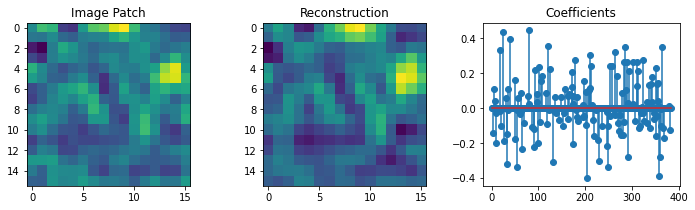

In [9]:
fig,(ax1,ax2,ax3)=  plt.subplots(figsize=(12,3),nrows=1, ncols=3)
ax1.imshow(data[0,:].detach().reshape(patch_size,patch_size))
ax1.set_title('Image Patch')

ax2.imshow(reconstruction[0,:].detach().reshape(patch_size,patch_size))
ax2.set_title('Reconstruction')

ax3.stem(A[0,:].reshape(-1))
ax3.set_title('Coefficients')
plt.show()